# Experiment 4
**Aim**: WAP to represent a data set and its single variate/ multi-variate plots.

# Importing the Required modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Synthesizing Data for Analysis

In [12]:
np.random.seed(100) # For consistent results
num_samples = 10000
df = pd.DataFrame({
    'Age': np.random.gamma(25, 1, num_samples),
    'Sex': np.random.choice(['M', 'F'], num_samples),
    'Height': np.random.normal(155, 10, num_samples),
})
df.head()

,Age,Sex,Height
0,16.956970,M,179.926812
1,26.408051,M,154.454346
2,29.868494,F,158.671468
3,27.309717,F,147.710162
4,23.737444,F,157.276545


# Univariate Analysis

Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

Some patterns that can be easily identified with univariate analysis are Central Tendency (mean, mode and median), Dispersion (range, variance), Quartiles (interquartile range), and Standard deviation.

Text(0.5, 1.0, 'Age Distribution')

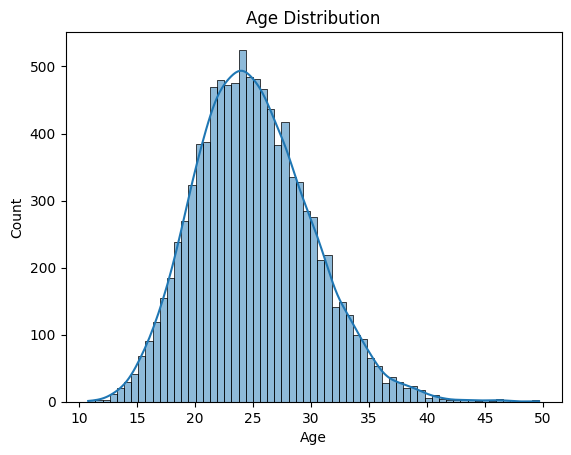

In [41]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Height Distribution')

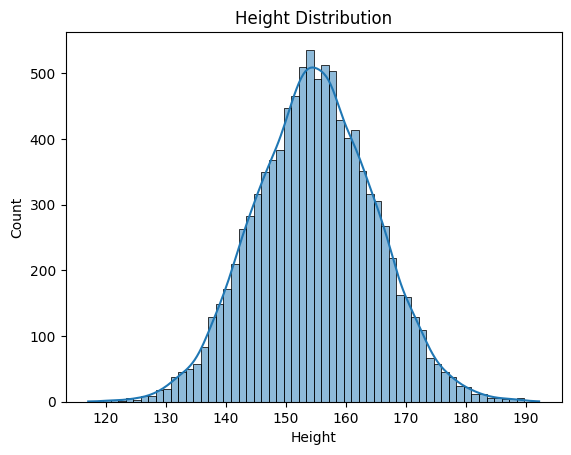

In [42]:
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')

Text(0.5, 1.0, 'Gender')

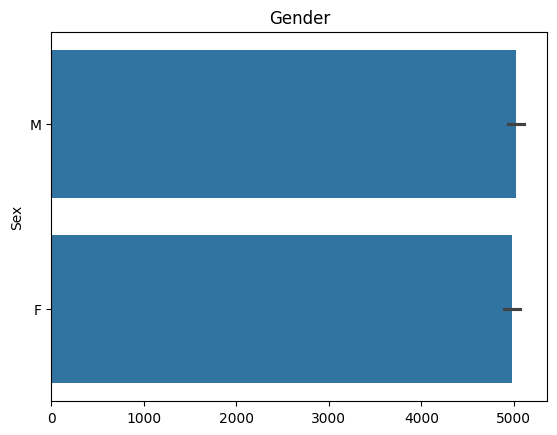

In [43]:
sns.barplot(df['Sex'])
plt.title('Gender')

# Multivariate Analysis

Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to study more complex sets of data. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc. More than 20 different ways to perform multivariate analysis exist and which one to choose depends upon the type of data and the end goal to achieve. The most common ways are:
1. Clustering
2. Principal Component Analysis (PCA)

We will be performing PCA on the above data. Importing `Scikit Learn`.   

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
scaler = StandardScaler()
le = LabelEncoder()

df_copy = df.copy()
df_copy['Sex'] = le.fit_transform(df['Sex']) # replacing 'M' and 'F'

scaler.fit(df_copy)
scaled_data = scaler.transform(df_copy)

pca = PCA(n_components=3)
pca.fit(scaled_data)
x = pca.transform(scaled_data)


array([[ 2.92424321, -1.13267494,  0.26873187],
       [ 0.48671773,  0.76801414, -0.48055361],
       [-0.59360215,  0.20988708,  1.30333003],
       ...,
       [-1.53416247,  0.61861281,  0.71526509],
       [-0.14555821,  2.34158009,  0.31994505],
       [-0.20202894,  1.62847182, -0.39451675]])

Text(0, 0.5, 'pc2')

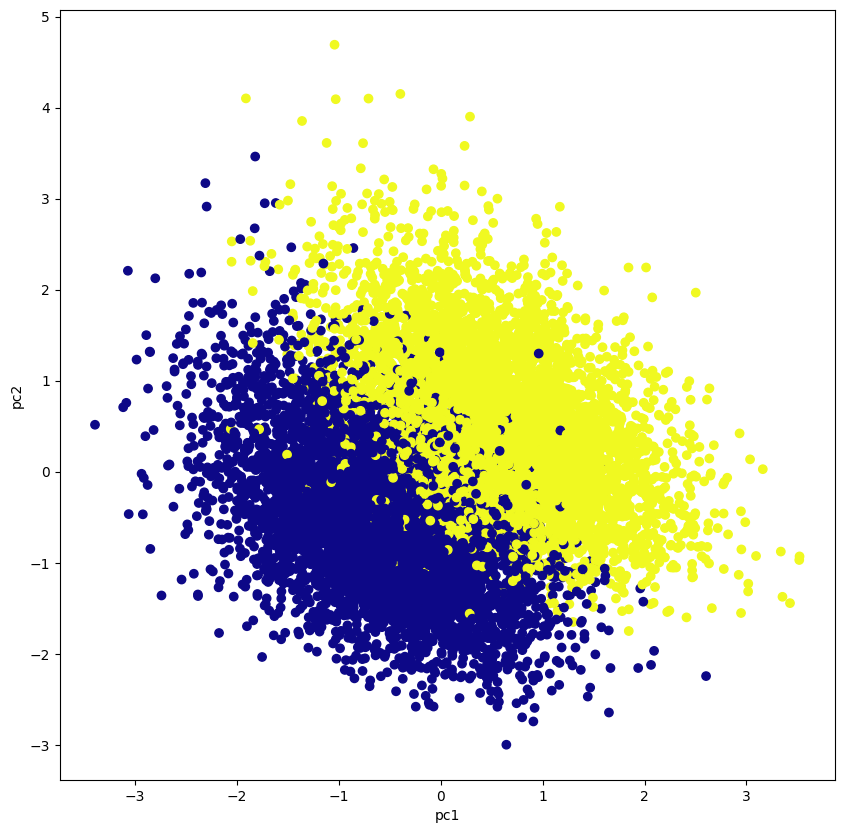

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=df_copy['Sex'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')